# PCA derivation witn Lagrange multipliers and usage

# Outline
- [ 1 - Theory behind PCA](#1)
- [ 2 - Import Data and brief EDA](#2)
- [ 3 - Feature selection and train custom model](#3)
- [ 4 - Training sklearm model and fine tuning](#4)

<a name="1"></a>
## 1 - Theory behind PCA

<br>The goal of Principal Component Analysis (PCA) is to find a set of orthogonal vectors (principal components) that capture the maximum variance in the data. We want to find these vectors in order of decreasing variance explained.
<br>PCA approach using Lagrange multipliers is an elegant mathematical method to derive the principal components. This approach provides a direct way to find the directions of maximum variance in the data. Let's break down this process step by step!

<br>1.	Matrix Representation of Data: First, let's consider how data is represented in matrix form. Suppose we have n observations of p variables. We can represent this data as a matrix X:
$$
X = [ [x₁₁, x₁₂, ..., x₁ₚ], [x₂₁, x₂₂, ..., x₂ₚ], ... [xₙ₁, xₙ₂, ..., xₙₚ] ]
$$
Where xᵢⱼ represents the value of the j-th variable for the i-th observation.

<br>2.	Variance-Covariance Matrix: The variance of this multivariate data is typically represented by the variance-covariance matrix, often denoted as Σ (sigma). This matrix is a p × p symmetric matrix where:
<br>•	The diagonal elements (i = j) represent the variances of individual variables.
<br>•	The off-diagonal elements (i ≠ j) represent the covariances between pairs of variables.

$$
Σ = [ [σ₁₁, σ₁₂, ..., σ₁ₚ], [σ₂₁, σ₂₂, ..., σ₂ₚ], ... [σₚ₁, σₚ₂, ..., σₚₚ] ]
$$
<br>3.	Calculating the Variance-Covariance Matrix: To calculate Σ, we use the following formula:
$$
Σ = (1 / (n-1)) * (X - \tilde{X̄})ᵀ * (X - \tilde{X̄})
$$
<br>Where:
<br>•	X is the original data matrix
<br>•	X̄ is a matrix where each column is the mean of the corresponding column in X
<br>•	(X - X̄) is the centered data matrix
<br>•	ᵀ denotes the transpose of a matrix
<br>4.	Properties of the Variance-Covariance Matrix:
<br>•	It is always symmetric: σᵢⱼ = σⱼᵢ
<br>•	The diagonal elements (σᵢᵢ) represent the variance of the i-th variable
<br>•	The off-diagonal elements (σᵢⱼ, i ≠ j) represent the covariance between the i-th and j-th variables
<br>5.	Interpretation:
<br>•	Large values on the diagonal indicate high variability in that particular variable.
<br>•	Off-diagonal elements show how variables covary with each other. Positive values indicate positive correlation, negative values indicate negative correlation, and values close to zero indicate little to no linear relationship.
<br>6.	Correlation Matrix: Sometimes, it's useful to standardize the variance-covariance matrix to get the correlation matrix. This is done by dividing each element by the product of the standard deviations of the corresponding variables:

$$
ρᵢⱼ = σᵢⱼ / (√σᵢᵢ * √σⱼⱼ)
$$
<br>This matrix has 1's on the diagonal and correlation coefficients (between -1 and 1) on the off-diagonal elements.
<br>Let's consider a data matrix X (n × p), where n is the number of observations and p is the number of variables. We assume the data is centered (mean-subtracted).
<br>We want to find a unit vector w that maximizes the variance of the projected data:
$$
\begin{cases}
        \max_{w} (var(Xw)=w^T Σ w)\\
        \| w \| = 1
\end{cases}
$$

<br>where Σ  - is the covariance matrix of X.

<br>Breaking down the projections on w:
<br>1.	Starting with the data matrix X: X is an n × p matrix, where n is the number of observations and p is the number of variables. We assume X is centered (mean-subtracted).
<br>2.	Projection onto w: When we project X onto a unit vector w, we get Xw, which is an n × 1 vector.
<br>3.	Variance of the projection: The variance of this projection is what we want to maximize. Let's derive this:

$$
var(Xw)=E[(Xw - E[Xw])^2]
$$
Since X is centered, E[Xw] = 0, so:
$$
var(Xw) = E[(Xw)^2] = E[(Xw)^T(Xw)] = E[w^T X^T X w]
$$
<br>4.	Introducing the covariance matrix: The sample covariance matrix Σ is defined as:
$$
Σ = (1/(n-1)) X^T X
$$
<br>5.	Substituting Σ: Now we can rewrite our variance expression:
$$
var(Xw) = E[w^T X^T X w] = w^T E[X^T X] w = w^T ((n-1)Σ) w = (n-1) w^T Σ w
$$
<br>6.	Final form: Since (n-1) is a constant scalar, maximizing var(Xw) is equivalent to maximizing w^T Σ w. This is why we often see the optimization problem written as:
$$
\begin{cases}
        \max_{w} (var(Xw)=w^T Σ w)\\
        \| w \| = 1
\end{cases}
$$
<br>Let's write down Lagrangian of our optimization problem:
$$
L(w,\lambda)=w^T Σ w - \lambda(w^Tw - 1)
$$
<br>To find the critical points, we take the partial derivative of L with respect to w and set it to zero:
$$
\nabla_w L=2Σw - 2λw = 0
$$
<br>This simplifies to:
$$
Σw = λw
$$
<br>The equation Σw = λw is precisely the eigenvalue equation for the covariance matrix Σ. This means:

<br>•	The eigenvectors of Σ are the principal components we're looking for.
<br>•	The corresponding eigenvalues (λ) represent the variance explained by each principal component.
<br>7.	Solving for Principal Components:
<br>•	We solve the eigenvalue equation to find all eigenvectors and eigenvalues of Σ.
<br>•	We sort the eigenvectors in descending order of their corresponding eigenvalues.
<br>•	These sorted eigenvectors are our principal components, with the first one explaining the most variance, the second one explaining the second most, and so on.
<br>8.	Properties of the Solution:
<br>•	The Lagrange multiplier λ turns out to be the variance explained by the corresponding principal component.
<br>•	The constraint w^T w = 1 ensures that each principal component is a unit vector.
<br>•	The orthogonality of eigenvectors ensures that principal components are uncorrelated.

<br>9.	Proportion of Variance Explained:
<br>For each principal component, the proportion of total variance explained is given by:
$$
λ_i/ \displaystyle\sum_{i=1}^lλ_i
$$

<br>Where λᵢ is the i-th eigenvalue and the denominator is the sum of all eigenvalues (which equals the trace of Σ).

<br> Basically, what we get is the information about variance in data spread across the most significant dimensions, chosen in such a way that keeps as much variance of original data as possible. By analyzing eigenvalues, we can choose the number of components (vectors that span new dimensions) and reduce the given amount of features.

<a name="2"></a>
## 2 - Import Data and brief EDA

In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/Users/sergeiakhmadulin/My Drive/PCA/iris.csv")

In [4]:
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


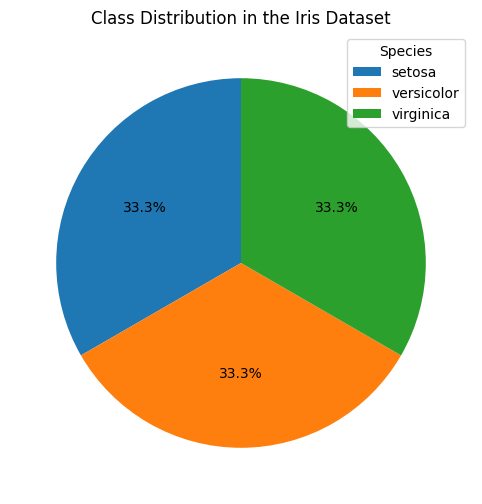

In [23]:
# Count the occurrences of each species
species_counts = data['species'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(species_counts, autopct='%1.1f%%', startangle=90)
plt.legend(species_counts.index, title="Species", loc="best")
# Set the title
plt.title('Class Distribution in the Iris Dataset')

# Show the plot
plt.show()

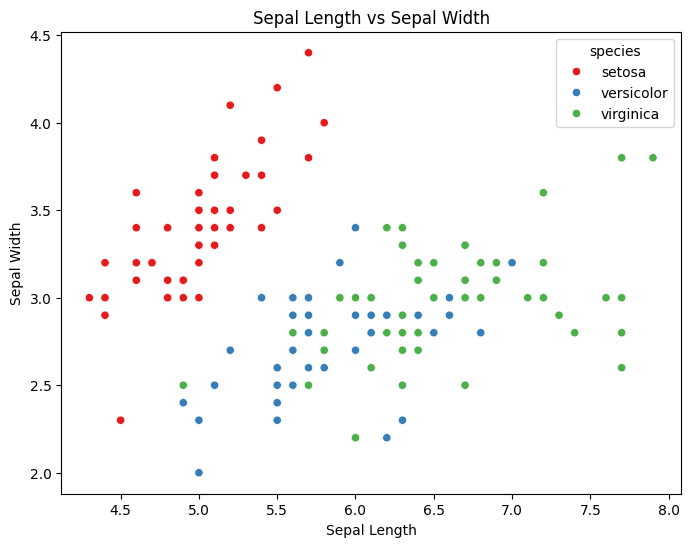

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', palette='Set1')

# Add labels and title
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# Show the plot
plt.show()

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [90]:
X=scaler.fit_transform(data.iloc[:,:4])

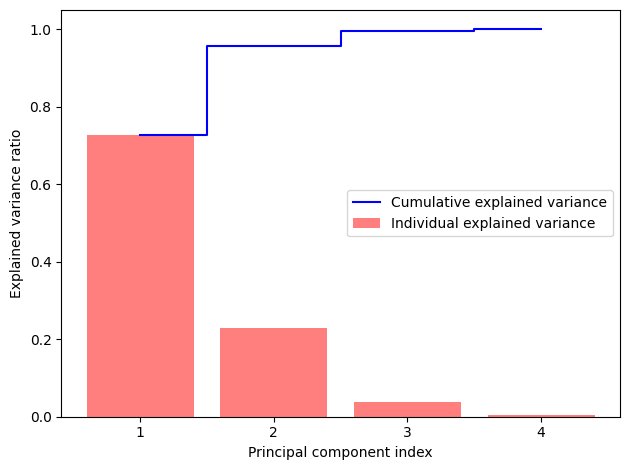

In [91]:
import PCA as pca
pca_obj = pca.PCA(n_component = 2)

matrix_data = X
pca_obj.fit(matrix_data)
pca_obj.plot_explained_variance(matrix_data)

In [92]:
transformed_pca = pca_obj.pca_transform(matrix_data)

In [93]:
transformed_pca = pd.DataFrame(transformed_pca, columns=['Component_1', 'Component_2'])

In [94]:
transformed_pca["species"] = data["species"]

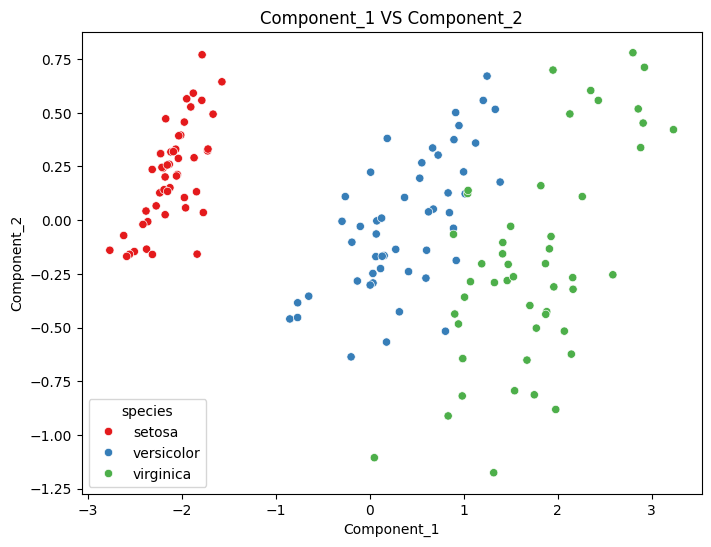

In [96]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=transformed_pca, x="Component_1", y="Component_2", hue='species', palette='Set1')

# Add labels and title
plt.title("Component_1 VS Component_2")
plt.xlabel("Component_1")
plt.ylabel("Component_2")

# Show the plot
plt.show()

In [154]:
encoder = LabelEncoder()
y_numeric = encoder.fit_transform(transformed_pca[["species"]])

In [156]:
X_train, X_test, y_train, y_test = train_test_split(transformed_pca[["Component_1","Component_2"]], 
                                                    y_numeric, test_size = 0.2, random_state=20, 
                                                    stratify=transformed_pca[["species"]])

In [157]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [158]:
print("Train score: ",knn.score(X_train,y_train),"%")
print("Test score: ",knn.score(X_test,y_test),"%")

Train score:  0.95 %
Test score:  1.0 %


In [159]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [160]:

kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters for 3 classes
kmeans.fit(X_train)
centroids = kmeans.cluster_centers_

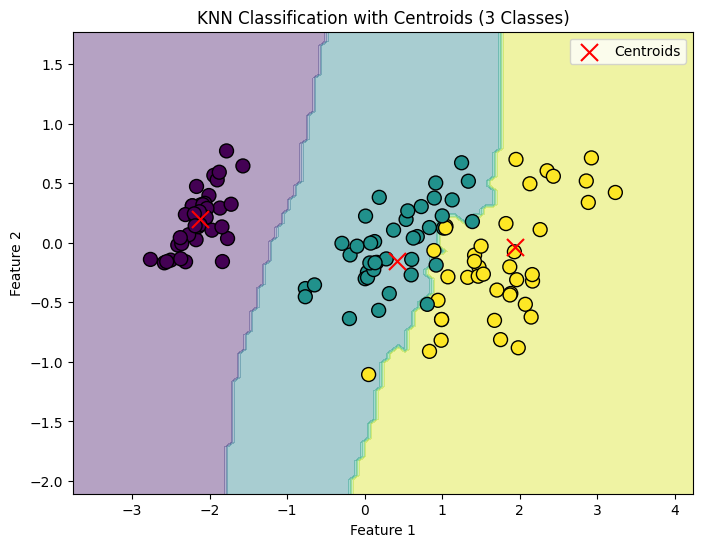

In [167]:
plt.figure(figsize=(8, 6))

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the data points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', marker='o', s=100)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=150, label='Centroids')

# Labels and Title
plt.title('KNN Classification with Centroids (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()